# 1.1 - What is Artificial Intelligence?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/madeforai/madeforai/blob/main/docs/understanding-ai/module-1/1.1-what-is-ai.ipynb)

---

**Your first step into the fascinating world of AI—where machines learn, adapt, and solve problems like never before.**

## 📚 What You'll Learn

- **What AI really means** and how it differs from traditional programming
- **The history and evolution** of AI from the 1950s to today
- **Key types of AI** and how they're used in everyday applications
- **Build your first AI classifier** to classify whether text is positive or negative

## ⏱️ Estimated Time
25-30 minutes

## 📋 Prerequisites
- Basic Python knowledge (variables, functions, lists)
- Curiosity and enthusiasm! ✨

## 🤖 Welcome to the AI Revolution

Imagine teaching a computer to recognize your handwriting, recommend movies you'll love, or even have a conversation with you. Sound like science fiction? Welcome to 2026—where Artificial Intelligence is not just real, it's everywhere!

But what exactly *is* AI? At its core, **Artificial Intelligence** is the science of making computers do things that would normally require human intelligence—like seeing, hearing, learning, reasoning, and making decisions.

Here's the key difference: 
- **Traditional programming**: You write exact rules → Computer follows them
- **AI programming**: You give examples → Computer learns the rules

Think of it like teaching a child to ride a bike. You don't write a manual with every muscle movement. Instead, you show them, let them practice, and they *learn* through experience. That's AI!

## 📖 A Brief History: From Dreams to Reality

Let's take a quick journey through time to see how we got here:

**1950s - The Birth** 🍼  
Alan Turing asked "Can machines think?" The Turing Test was born. First AI programs played checkers.

**1960s-70s - Early Optimism** 🌅  
Researchers believed human-level AI was just around the corner. ELIZA chatbot fooled people into thinking it understood them.

**1980s-90s - AI Winter** ❄️  
Progress slowed, funding dried up. Too much hype, not enough computing power.

**2000s - The Comeback** 🔥  
Big data + faster computers + better algorithms = AI Renaissance. Google, Facebook, Amazon invest heavily.

**2010s - Deep Learning Era** 🚀  
Neural networks conquer image recognition, speech recognition, game playing (AlphaGo beats world champion).

**2020s - AI Everywhere** 🌍  
ChatGPT, DALL-E, self-driving cars, protein folding (AlphaFold), and you're learning AI right now!

## 🎯 Types of AI: Understanding the Landscape

AI isn't one thing—it's a spectrum of capabilities:

### By Intelligence Level:

1. **Narrow AI (ANI)** - Specialized in ONE task
   - Your Spotify recommendations
   - Face unlock on your phone  
   - Gmail's spam filter
   - *Status: Everywhere today! This is what we'll learn to build.*

2. **General AI (AGI)** - Human-like intelligence across ANY task  
   - Can learn any intellectual task a human can
   - Understands context and transfers knowledge
   - *Status: Doesn't exist yet (researchers debate when/if it will)*

3. **Super AI (ASI)** - Surpasses human intelligence
   - Exceeds humans in creativity, problem-solving, everything
   - *Status: Pure speculation (might never happen)*

### By Learning Approach:

1. **Machine Learning (ML)** - Learns patterns from data
2. **Deep Learning (DL)** - ML using neural networks (many layers)
3. **Reinforcement Learning (RL)** - Learns through trial and error (like training a dog)

Don't worry if this feels like a lot—we'll explore each in detail throughout this course!

In [1]:
# Setup: Install required packages
# Uncomment the line below if running in Google Colab
# !pip install numpy matplotlib pandas scikit-learn seaborn -q

# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Set visualization style for beautiful plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Setup complete! All libraries loaded successfully.")
print("🎯 Ready to build your first AI model!")

✅ Setup complete! All libraries loaded successfully.
🎯 Ready to build your first AI model!


## 🛠️ Your First AI Model: Sentiment Classifier

Theory is great, but let's get our hands dirty! We're going to build a simple AI that can tell whether a movie review is **positive** or **negative**. This is called **sentiment analysis**, and companies use it to:
- Analyze customer feedback
- Monitor brand reputation on social media
- Understand public opinion

### The Game Plan:

1. **Collect data** - Get example reviews (labeled as positive/negative)
2. **Prepare data** - Convert text to numbers (computers love numbers!)
3. **Train model** - Let the AI learn patterns from examples
4. **Test model** - See how well it predicts on new reviews
5. **Use model** - Classify new, unseen reviews

Let's do this! 🚀

In [2]:
# Step 1: Create our training data
# In real projects, you'd have thousands of reviews. We'll start small to understand the concept.

# Positive reviews (label = 1)
positive_reviews = [
    "This movie was fantastic! I loved every minute.",
    "Absolutely brilliant performance. A must-watch!",
    "Best film I've seen this year. Highly recommend.",
    "Amazing storyline and great acting. Superb!",
    "I enjoyed this movie thoroughly. Well done!",
    "Outstanding cinematography and direction.",
    "This exceeded all my expectations. Wonderful!",
    "A masterpiece of modern cinema. Loved it!"
]

# Negative reviews (label = 0)
negative_reviews = [
    "Terrible movie. Complete waste of time.",
    "I hated every second. Absolutely awful.",
    "Boring and predictable. Very disappointing.",
    "Poor acting and weak plot. Not worth watching.",
    "This was bad. I want my money back.",
    "Worst movie I've seen. Total disaster.",
    "Dreadful film with horrible dialogue.",
    "Painfully boring. I almost fell asleep."
]

# Combine and create labels
reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

print(f"📊 Dataset created with {len(reviews)} reviews:")
print(f"   - Positive reviews: {len(positive_reviews)}")
print(f"   - Negative reviews: {len(negative_reviews)}")
print("\n🔍 Sample positive review:", positive_reviews[0])
print("🔍 Sample negative review:", negative_reviews[0])

📊 Dataset created with 16 reviews:
   - Positive reviews: 8
   - Negative reviews: 8

🔍 Sample positive review: This movie was fantastic! I loved every minute.
🔍 Sample negative review: Terrible movie. Complete waste of time.


## 🔢 Converting Text to Numbers

Computers can't read words the way we do—they need numbers. We'll use a technique called **Bag of Words**:

1. Look at all words across all reviews
2. Create a "vocabulary" of unique words  
3. For each review, count how many times each word appears
4. Create a vector of numbers representing that review

**Example:**  
Vocabulary: `["movie", "good", "bad", "love", "hate"]`  
Review: *"I love this movie"*  
Vector: `[1, 0, 0, 1, 0]` (1 "movie", 1 "love", rest are 0)

<!-- [PLACEHOLDER IMAGE]
Prompt for image generation:
"Create an educational diagram showing text-to-numbers conversion using Bag of Words.
Style: Clean, minimalist, infographic style.
Elements: 
- Left side: 3 sample text reviews (shown as documents)
- Middle: Vocabulary list (showing unique words extracted)
- Right side: Numerical vectors (showing word counts as numbers in boxes)
- Arrows connecting each element showing the transformation process
Color scheme: Blue and orange gradient with white background.
Include labels: 'Text Input', 'Vocabulary', 'Numerical Vectors'.
Format: Wide horizontal layout (16:9 ratio)." -->

Let's see this in action:

In [3]:
# Step 2: Convert text to numbers using CountVectorizer
# This is our "translator" from words to numbers

vectorizer = CountVectorizer(lowercase=True, stop_words='english')
# lowercase=True: Convert all text to lowercase ("Good" and "good" are the same)
# stop_words='english': Remove common words like "the", "is", "and" (they don't help much)

# Fit and transform: Learn vocabulary + convert reviews to numbers
X = vectorizer.fit_transform(reviews)

print("🔤 Vocabulary learned:")
vocab = vectorizer.get_feature_names_out()
print(f"   Total unique words: {len(vocab)}")
print(f"   Sample words: {list(vocab[:15])}")

print("\n🔢 Review converted to numbers:")
print(f"   Shape of our data: {X.shape}")
print(f"   (This means {X.shape[0]} reviews, each represented by {X.shape[1]} numbers)")

# Let's see what one review looks like as numbers
print("\n📝 First review (original):", reviews[0])
print("📊 First review (as numbers):")
first_review_vector = X[0].toarray()[0]
# Show only non-zero values for clarity
non_zero_indices = np.where(first_review_vector > 0)[0]
for idx in non_zero_indices:
    print(f"   '{vocab[idx]}': {first_review_vector[idx]}")

🔤 Vocabulary learned:
   Total unique words: 58
   Sample words: ['absolutely', 'acting', 'amazing', 'asleep', 'awful', 'bad', 'best', 'boring', 'brilliant', 'cinema', 'cinematography', 'complete', 'dialogue', 'direction', 'disappointing']

🔢 Review converted to numbers:
   Shape of our data: (16, 58)
   (This means 16 reviews, each represented by 58 numbers)

📝 First review (original): This movie was fantastic! I loved every minute.
📊 First review (as numbers):
   'fantastic': 1
   'loved': 1
   'minute': 1
   'movie': 1


## 🎓 Training Our AI Model

Now comes the magic! We'll use a **Naive Bayes classifier**—a simple but effective algorithm that learns probability patterns.

**How it works (simplified):**
- Looks at which words appear more in positive vs negative reviews
- Calculates probability: "If this word appears, how likely is this review positive?"
- For a new review, combines probabilities of all its words to make a prediction

**Fun fact:** Despite its name "naive", this algorithm powers spam filters in millions of email accounts! 📧

<!-- [PLACEHOLDER IMAGE]
Prompt for image generation:
"Create a simple diagram showing how a Naive Bayes classifier works for sentiment analysis.
Style: Friendly, educational, colorful.
Elements:
- Top: Two groups of words (positive words in green, negative words in red)
- Middle: A new review coming in (shown as a document icon with an arrow)
- Bottom: The classifier analyzing word probabilities (shown as a simple flowchart)
- Final prediction shown as thumbs up (positive) or thumbs down (negative)
Include thought bubble from classifier saying 'Calculating probabilities...'
Color scheme: Green for positive, red for negative, blue for the classifier.
Format: Vertical layout." -->

In [4]:
# Step 3: Split data into training and testing sets
# We'll use 80% to train, 20% to test how well the model learned

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

print("📚 Data split:")
print(f"   Training samples: {len(y_train)}")
print(f"   Testing samples: {len(y_test)}")

# Step 4: Create and train our AI model
model = MultinomialNB()
model.fit(X_train, y_train)

print("\n🎉 Model trained successfully!")
print("   The AI has learned patterns from the training reviews.")

📚 Data split:
   Training samples: 12
   Testing samples: 4

🎉 Model trained successfully!
   The AI has learned patterns from the training reviews.


📊 Model Performance:
   Accuracy: 25.0%
   (1 out of 4 predictions correct)


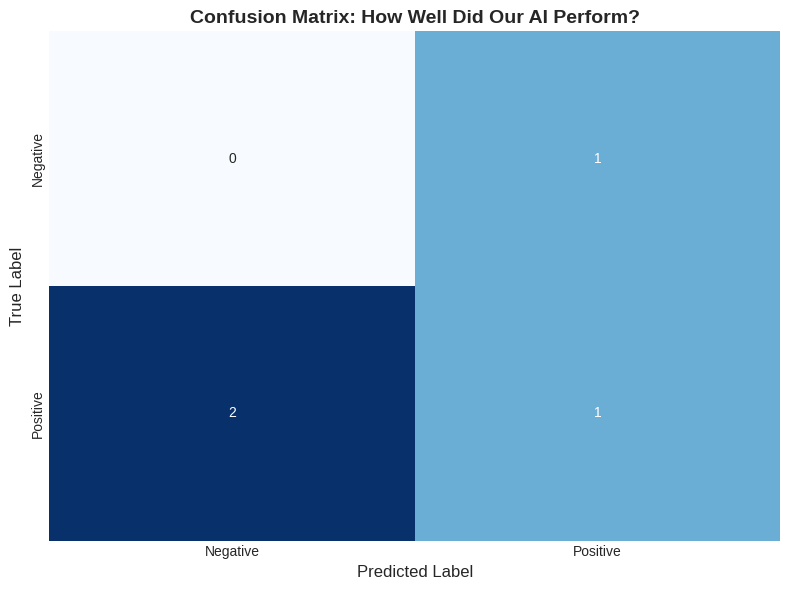


💡 Reading the matrix:
   - Top-left: Correctly identified negative reviews
   - Bottom-right: Correctly identified positive reviews
   - Other squares: Mistakes (if any)


In [5]:
# Step 5: Test how well our model performs

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"   Accuracy: {accuracy * 100:.1f}%")
print(f"   ({int(accuracy * len(y_test))} out of {len(y_test)} predictions correct)")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize results
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar=False)
plt.title('Confusion Matrix: How Well Did Our AI Perform?', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\n💡 Reading the matrix:")
print("   - Top-left: Correctly identified negative reviews")
print("   - Bottom-right: Correctly identified positive reviews")
print("   - Other squares: Mistakes (if any)")

## 🚀 Using Our AI on New Reviews

The moment of truth! Let's test our AI on reviews it has NEVER seen before. This is where the magic happens—can it generalize its learning to new data?

In [6]:
# New reviews the model has never seen
new_reviews = [
    "This was an excellent movie with great performances!",
    "Terrible waste of time. I hated it.",
    "Mediocre at best. Expected much more.",
    "Absolutely loved this film. A true gem!",
    "Boring and slow. Not recommended."
]

# Convert new reviews to numbers (using the SAME vocabulary)
X_new = vectorizer.transform(new_reviews)

# Make predictions
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)

# Display results
print("🔮 AI Predictions on New Reviews:\n")
for i, review in enumerate(new_reviews):
    sentiment = "😊 POSITIVE" if predictions[i] == 1 else "😞 NEGATIVE"
    confidence = max(probabilities[i]) * 100
    
    print(f"Review {i+1}: \"{review}\"")
    print(f"   Prediction: {sentiment}")
    print(f"   Confidence: {confidence:.1f}%\n")

🔮 AI Predictions on New Reviews:

Review 1: "This was an excellent movie with great performances!"
   Prediction: 😊 POSITIVE
   Confidence: 54.1%

Review 2: "Terrible waste of time. I hated it."
   Prediction: 😞 NEGATIVE
   Confidence: 93.6%

Review 3: "Mediocre at best. Expected much more."
   Prediction: 😊 POSITIVE
   Confidence: 61.4%

Review 4: "Absolutely loved this film. A true gem!"
   Prediction: 😊 POSITIVE
   Confidence: 66.3%

Review 5: "Boring and slow. Not recommended."
   Prediction: 😞 NEGATIVE
   Confidence: 79.1%



## 🎯 Exercise 1: Experiment with Your Own Reviews

**Objective:** Test the AI with your own movie reviews!

**Task:**  
1. Create 2-3 new movie reviews (can be positive or negative)
2. Use the code below to see what the AI predicts
3. Does it match your expectation? Why or why not?

**Hints:**
<details>
<summary>💡 Hint 1: Creating reviews</summary>
Think about what words the AI might have learned. Use clear positive/negative language.
</details>

<details>
<summary>💡 Hint 2: Testing edge cases</summary>
Try sarcastic reviews like "Oh great, another terrible movie" - will the AI understand sarcasm?
</details>

In [7]:
# Your turn! Add your own reviews here
your_reviews = [
    "Add your first review here",
    "Add your second review here",
    # Add more reviews if you want!
]

# Predict (same code as before)
X_yours = vectorizer.transform(your_reviews)
your_predictions = model.predict(X_yours)
your_probs = model.predict_proba(X_yours)

print("🎯 Your Reviews:\n")
for i, review in enumerate(your_reviews):
    sentiment = "😊 POSITIVE" if your_predictions[i] == 1 else "😞 NEGATIVE"
    confidence = max(your_probs[i]) * 100
    print(f"Review: \"{review}\"")
    print(f"   → {sentiment} (Confidence: {confidence:.1f}%)\n")

🎯 Your Reviews:

Review: "Add your first review here"
   → 😞 NEGATIVE (Confidence: 58.3%)

Review: "Add your second review here"
   → 😞 NEGATIVE (Confidence: 71.6%)



## 🎯 Exercise 2: What Makes a Review Positive?

**Objective:** Discover which words the AI associates with positive/negative reviews

**Task:**  
Look at the code below that shows the most "important" words for each sentiment. 
Do they make sense? Are there any surprises?

**Expected Output:** Two lists of words—one for positive, one for negative sentiments

In [8]:
# Extract feature importance
feature_log_prob = model.feature_log_prob_
vocab_array = np.array(vocab)

# Get top words for negative class (index 0)
negative_indices = feature_log_prob[0].argsort()[-10:][::-1]
negative_words = vocab_array[negative_indices]

# Get top words for positive class (index 1)
positive_indices = feature_log_prob[1].argsort()[-10:][::-1]
positive_words = vocab_array[positive_indices]

print("🔴 Top words associated with NEGATIVE reviews:")
print("  ", list(negative_words))

print("\n🟢 Top words associated with POSITIVE reviews:")
print("  ", list(positive_words))

print("\n💭 Think about it:")
print("   - Do these word lists make sense?")
print("   - Would you use similar words when writing reviews?")
print("   - What might the AI miss? (Hint: sarcasm, context, nuance)")

🔴 Top words associated with NEGATIVE reviews:
   ['movie', 'boring', 've', 'weak', 'watching', 'waste', 'want', 'terrible', 'total', 'worth']

🟢 Top words associated with POSITIVE reviews:
   ['year', 'wonderful', 've', 'storyline', 'recommend', 'movie', 'superb', 'thoroughly', 'seen', 'modern']

💭 Think about it:
   - Do these word lists make sense?
   - Would you use similar words when writing reviews?
   - What might the AI miss? (Hint: sarcasm, context, nuance)


## 🎓 Key Takeaways

Congratulations! You just built your first AI model. Let's recap what you learned:

- ✅ **AI vs Traditional Programming**: AI learns from examples, traditional code follows explicit rules
- ✅ **History Matters**: AI has evolved over 70+ years from theory to everyday applications
- ✅ **Types of AI**: Narrow AI (what we use today) vs General AI (the future goal)
- ✅ **Machine Learning Workflow**: Data → Preparation → Training → Testing → Deployment
- ✅ **Text to Numbers**: Computers need numerical representations to process text
- ✅ **Real AI in Action**: You built a sentiment classifier that actually works!

### 🤔 Limitations to Remember:
- Our model can't understand sarcasm or context  
- It needs much more data to be production-ready
- Simple bag-of-words ignores word order

But that's okay—we're just getting started! 🌱

## 📖 Further Learning

**Recommended Reading:**
- [AI For Everyone by Andrew Ng (Coursera)](https://www.coursera.org/learn/ai-for-everyone) - Excellent non-technical overview
- [A Brief History of AI](https://www.ibm.com/topics/artificial-intelligence) - IBM's comprehensive timeline
- [What is Sentiment Analysis?](https://monkeylearn.com/sentiment-analysis/) - Deep dive into this application

**Video Tutorials:**
- [AI Explained by Google](https://www.youtube.com/watch?v=mJeNghZXtMo) - 5-minute overview
- [The History of AI](https://www.youtube.com/watch?v=ejvlZ2jPb5o) - Animated timeline

**Interactive Tools:**
- [Google Teachable Machine](https://teachablemachine.withgoogle.com/) - Build AI models in your browser
- [Quick, Draw!](https://quickdraw.withgoogle.com/) - See AI recognize your drawings in real-time

**Research Papers** (for the curious):
- [Computing Machinery and Intelligence](https://academic.oup.com/mind/article/LIX/236/433/986238) - Alan Turing's foundational paper (1950)

## ➡️ What's Next?

In the next chapter, **1.2 - The AI Landscape**, you'll learn about:

**Coming up:**
- The difference between Narrow, General, and Super AI in depth
- Current AI applications across industries (healthcare, finance, entertainment)
- The AI tech stack: ML, Deep Learning, NLP, Computer Vision, and more
- Where we are in 2026 and where we're headed

You've taken your first step into the AI world. The journey ahead is even more exciting! 🚀

Ready to continue? Open **[Chapter 1.2 - The AI Landscape](1.2-ai-landscape.ipynb)**!

---

### 💬 Feedback
Have questions or suggestions? We'd love to hear from you! Join our [Discord community](https://discord.gg/madeforai) or [open an issue on GitHub](https://github.com/madeforai/madeforai/issues).

**Happy learning!** 🎉